In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.animation import FuncAnimation
import sys


In [2]:
PI = 3.14159

def simplePlot(spx, spy, uplim):
    fig, axs = plt.subplots(1, 1, figsize=(40, 30), sharex=True, sharey=True,
                            tight_layout=True)
    axs.plot(spx[:uplim], spy[:uplim], "+")
    axs.set_xlim(-52, -50)
    axs.set_ylim(-2, 0)

    xmajor_ticks = np.arange(-52, -50.2, 0.2)
    xminor_ticks = np.arange(-52, -50.05, 0.05)
    ymajor_ticks = np.arange(-2, 0.2, 0.1)
    yminor_ticks = np.arange(-2, 0.05, 0.05)

    axs.set_xticks(xmajor_ticks)
    axs.set_xticks(xminor_ticks, minor=True)
    axs.set_yticks(ymajor_ticks)
    axs.set_yticks(yminor_ticks, minor=True)

    axs.grid( which='both', axis='both', color='grey', linestyle='-')
    axs.grid(which='minor', alpha=0.2)
    axs.grid(which='major', alpha=0.5)
    plt.savefig("./charts/xyPrecise.png")
    plt.show()

def houghTransformCircles(spx, spy, plot=False):
    size = len(spx)
    print(size)
    Aa = []
    Ab = []
    Ar = []
    rstep = 25
    rstart = 7*100
    rlim = 30*100
    rits=int((rlim-rstart)/rstep)
    for r in range(rstart, rlim, rstep):
        for x1 in range(size):
            for t in range(0, 360, 5):
                a = spx[x1] - r * np.cos(t * PI / 180)
                b = spy[x1] - r * np.sin(t * PI / 180)
                Aa.append(a)
                Ab.append(b)
                Ar.append(r)

    print(Aa, Ab, Ar, sep="\n")
    st = int(len(Aa) / rits)
    print("Zaczynamy pętłę", st)
    for x0 in range(rits):
        xt = Aa[x0 * st:((x0 + 1) * st - 1)]
        yt = Ab[x0 * st:((x0 + 1) * st - 1)]
        plt.plot(xt, yt, "+")
        tit = "R=" + str((rstart+x0*rstep)/100)
        plt.title(tit)
        plt.savefig("./charts/Transform/"+tit+".png")
        plt.show()
        """
        fig, axs = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True,
                                tight_layout=True)
        axs.hist2d(xt, yt, bins=(30, 30), norm=colors.LogNorm())
        axs.grid()
        tit = "R=" + str((rstart+x0*rstep)/100)
        axs.set_title(tit)
        plt.show()
        """

def houghTransformLine(spx,spy, spz):
    size = len(spx)
    print(size)
    spr=np.sqrt(np.multiply(spx,spx)+np.multiply(spy,spy))

    At = []
    Ar = []

    tstep = 1
    tstart = 0
    tlim = 360
    tits=int((tlim-tstart)/tstep)

    for x1 in range(size):
        for t in range(tstart, tlim, tstep):
            r = spz[x1]*np.cos(t) + spr[x1]*np.sin(t)
            At.append(t)
            Ar.append(r)

    print(At, Ar, sep="\n")
    plt.plot(Ar, At, "+")
    plt.title("Straight transform for event: "+str(entry))
    #plt.savefig("./charts/Transform/"+tit+".png")
    plt.show()

    fig, axs = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True,
                            tight_layout=True)
    axs.hist2d(Ar, At, bins=(1000, 50), norm=colors.LogNorm())
    axs.grid()
    axs.set_xlim(-200, 200)
    axs.set_title("Hist for event: "+str(entry))
    plt.show()

def plotEvent(spx, spy, spz, event):
    fig, axs = plt.subplots(1, 1, figsize=(12, 7.6), sharex=True, sharey=True,
                            tight_layout=True)
    axs.plot(spx, spy, "+")
    axs.grid()
    plt.title("Event:"+str(event))
    plt.show()

    fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharex=True, sharey=True,
                            tight_layout=True)
    axs.plot(spz, np.sqrt(np.multiply(spx,spx)+np.multiply(spy,spy)), "+")
    axs.grid()
    plt.title("Event:"+str(event))
    plt.show()



In [2]:
def loadEvent(entry):
    spxTemp= []
    spyTemp=[]
    spzTemp=[]
    spx=[]
    spy=[]
    spz=[]
    f = open("./data/spx"+str((entry - entry%200)/200))
    x0=0
    for line in f:
        if x0==entry%200:
            spxTemp.append(line.split(" "))
            for x1 in range(len(spxTemp[0][:-2])):
                spx.append(float(spxTemp[0][x1]))
        x0+=1
    f = open("./data/spy"+str((entry - entry%200)/200))
    x0=0
    for line in f:
        if x0 == entry % 200:
            spyTemp.append(line.split(" "))
            for x1 in range(len(spyTemp[0][:-2])):
                spy.append(float(spyTemp[0][x1]))
        x0+=1
    f = open("./data/spz"+str((entry - entry%200)/200))
    x0=0
    for line in f:
        if x0 == entry % 200:
            spzTemp.append(line.split(" "))
            for x1 in range(len(spzTemp[0][:-2])):
                spz.append(float(spzTemp[0][x1]))
        x0+=1
    print("Data Loaded. SPx.len: ", len(spx))
    return spx, spy, spz


entry = 177
spx, spy, spz = loadEvent(entry)
#plotEvent(spx, spy, spz, entry)

Data Loaded. SPx.len:  56


56
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

C:\Users\Hareck\.conda\envs\Visualizer\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
C:\Users\Hareck\.conda\envs\Visualizer\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


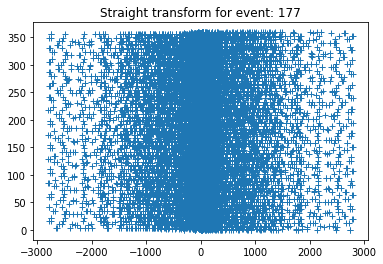

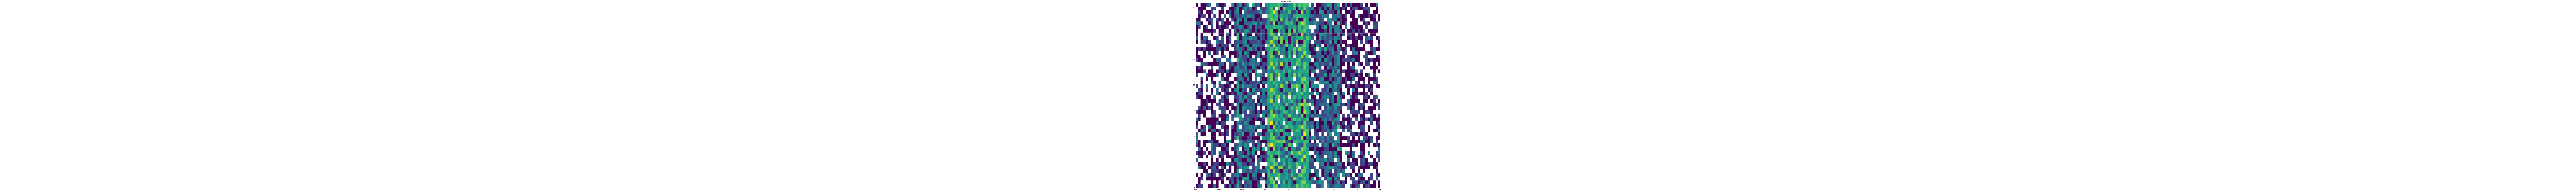

In [4]:
import matplotlib
matplotlib.use('agg')

def houghTransformLine(spx,spy, spz):
    size = len(spx)
    print(size)
    spr=np.sqrt(np.multiply(spx,spx)+np.multiply(spy,spy))

    At = []
    Ar = []

    tstep = 1
    tstart = 0
    tlim = 360
    tits=int((tlim-tstart)/tstep)

    for x1 in range(size):
        for t in range(tstart, tlim, tstep):
            r = spz[x1]*np.cos(t) + spr[x1]*np.sin(t)
            At.append(t)
            Ar.append(r)

    print(At, Ar, sep="\n")
    plt.plot(Ar, At, "+")
    plt.title("Straight transform for event: "+str(entry))
    #plt.savefig("./charts/Transform/"+tit+".png")
    plt.show()

    fig, axs = plt.subplots(1, 1, figsize=(20, 20), sharex=True, sharey=True,
                            tight_layout=True)
    axs.hist2d(Ar, At, bins=(1000, 50), norm=colors.LogNorm())
    axs.grid()
    axs.set_xlim(-200, 200)
    axs.set_title("Hist for event: "+str(entry))
    plt.show()

houghTransformLine(spx, spy, spz)

